In [12]:
import torchvision
import torch
from torchvision.models.detection import FasterRCNN
import numpy as np
import cv2

In [4]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()
# dataset = PennFudanDataset('PennFudanPed', get_transform(train=True))
# data_loader = torch.utils.data.DataLoader(
#  dataset, batch_size=2, shuffle=True, num_workers=4,
#  collate_fn=utils.collate_fn)
# # For Training
# images,targets = next(iter(data_loader))
# images = list(image for image in images)
# targets = [{k: v for k, v in t.items()} for t in targets]
# output = model(images,targets)   # Returns losses and detections
# For inference

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [8]:
x = [torch.rand(3, 300, 400), torch.rand(3, 500, 400)]
predictions = model(x)

In [9]:
predictions

[{'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([], grad_fn=<IndexBackward0>)},
 {'boxes': tensor([], size=(0, 4), grad_fn=<StackBackward0>),
  'labels': tensor([], dtype=torch.int64),
  'scores': tensor([], grad_fn=<IndexBackward0>)}]

In [50]:
im = cv2.imread("../calibration/data/left-0000.png")
tim = torch.Tensor(im).view(3, im.shape[0], -1)
# torch.Tensor(im).view(3, im.shape[0], -1).shape, torch.rand(3, 300, 400).shape
x = [tim]
model(x)

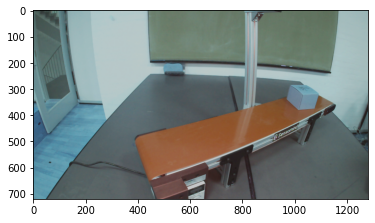

In [48]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [4]:
import numpy as np
# x y z x_dt y_dt z_dt x_dt2 y_dt2 z_dt2
state = np.array([[0,0,0,0,0,0,0,0,0]]).T

# # The initial uncertainty (6x6).
P = np.eye(9,9) * 1000

# # The external motion (6x1).
u = np.array([[0,0,0,0,0,0,0,0,0]]).T

# Jacobian
F = np.eye(9)
dt = 1/30
F[0][3] = dt
F[1][4] = dt
F[2][5] = dt
F[0][6] = (1/2) * dt**2
F[1][7] = (1/2) * dt**2
F[2][8] = (1/2) * dt**2

# # The observation matrix (2x6).
H = np.zeros((3,9))
H[0][0] = 1
H[1][1] = 1
H[2][2] = 1

# # The measurement uncertainty.
R = 5